# Calibrazione di un sensore di pressione

Lo scopo dell’esercitazione è quello di costruire un modello, prima lineare, e poi non lineare di un sensore di pressione in modo da ottenere una accuratezza maggiore. L'uscita del modello è la pressione.

## Setup
Il sensore di pressione viene sollecitato con una forza esercitata su di una superficie circolare di raggio r = 3 mm

Dati misurati contenuti nel file [pressure_calib.txt](pressure_calib.txt)
Prima colonna: forza misurata in [N]
Seconda colonna: risposta del sensore in unità [DAC] (convertitore a 10 bit)

In [1]:
# importo moduli
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 10]

In [3]:
# caricamento dati
calib = pd.read_csv("./pressure_calib.txt", header=None, names=["forza [N]", "DAC"]);
calib

,forza [N],DAC
0,0.000,87.0
1,0.005,87.0
2,0.010,88.0
3,0.015,89.0
4,0.020,89.0
...,...,...
101,0.705,482.0
102,0.710,488.0
103,0.715,492.0
104,0.720,500.0


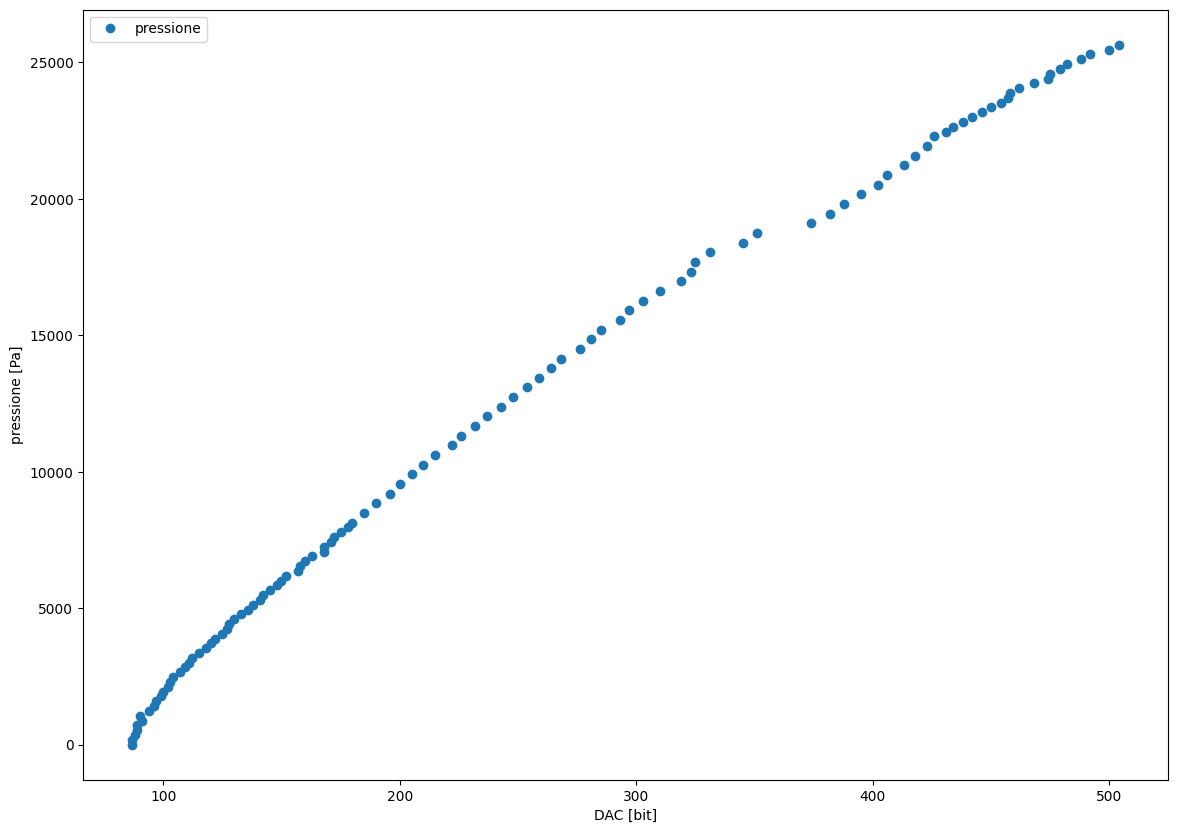

In [18]:
# calcolo pressione = forza/superficie
r = 3e-3;
p = calib["forza [N]"] / (pi * r**2);

# visualizzazione dati
plt.plot(calib["DAC"], p, 'o');
plt.xlabel('DAC [bit]');
plt.ylabel('pressione [Pa]');
plt.legend(["pressione"], loc="upper left");

Determinare
1. L’errore massimo percentuale con una calibrazione puramente lineare

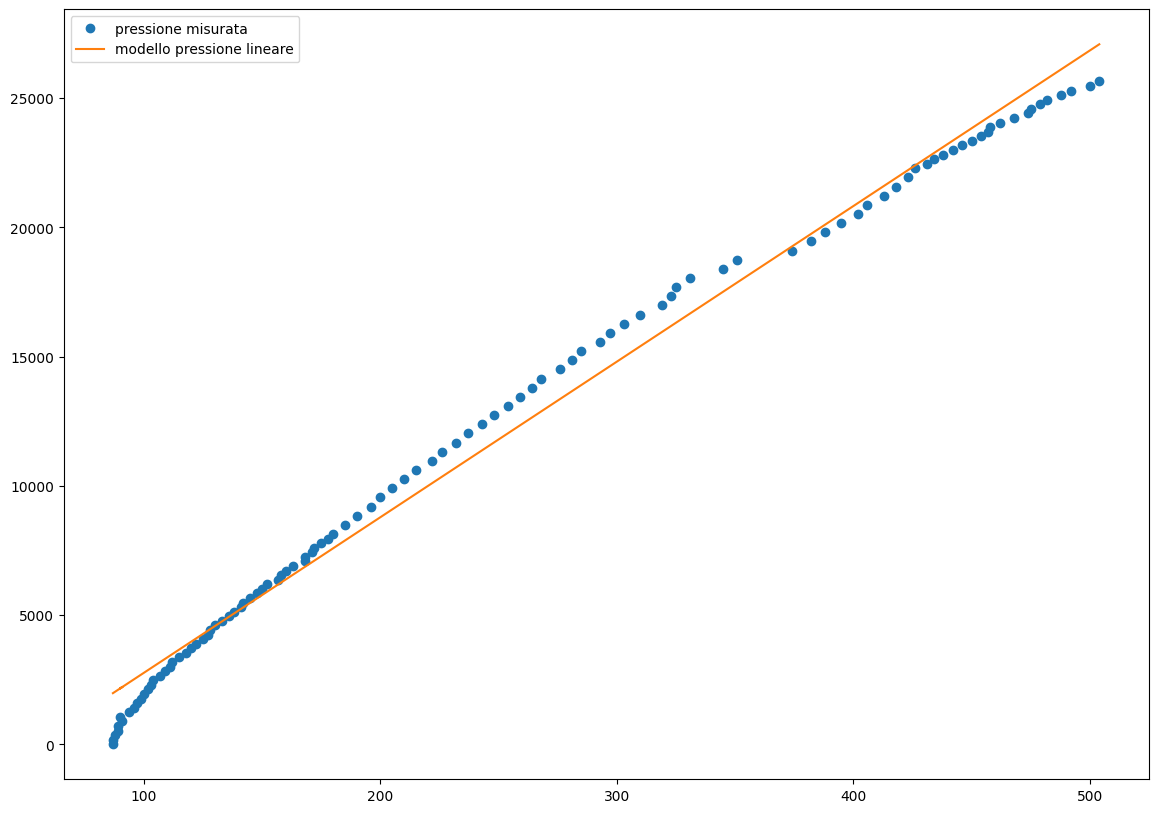

In [15]:
# stima modello lineare (polinomio di primo grado) con polyfit
modello1 = np.polyfit(calib["DAC"], p , 1);
ymodello1 = np.polyval(modello1, calib["DAC"]);

# confronto con dati
plt.plot(calib["DAC"], p, 'o', calib["DAC"], ymodello1);
plt.legend(["pressione misurata", "modello pressione lineare"]);

err = 7.71%


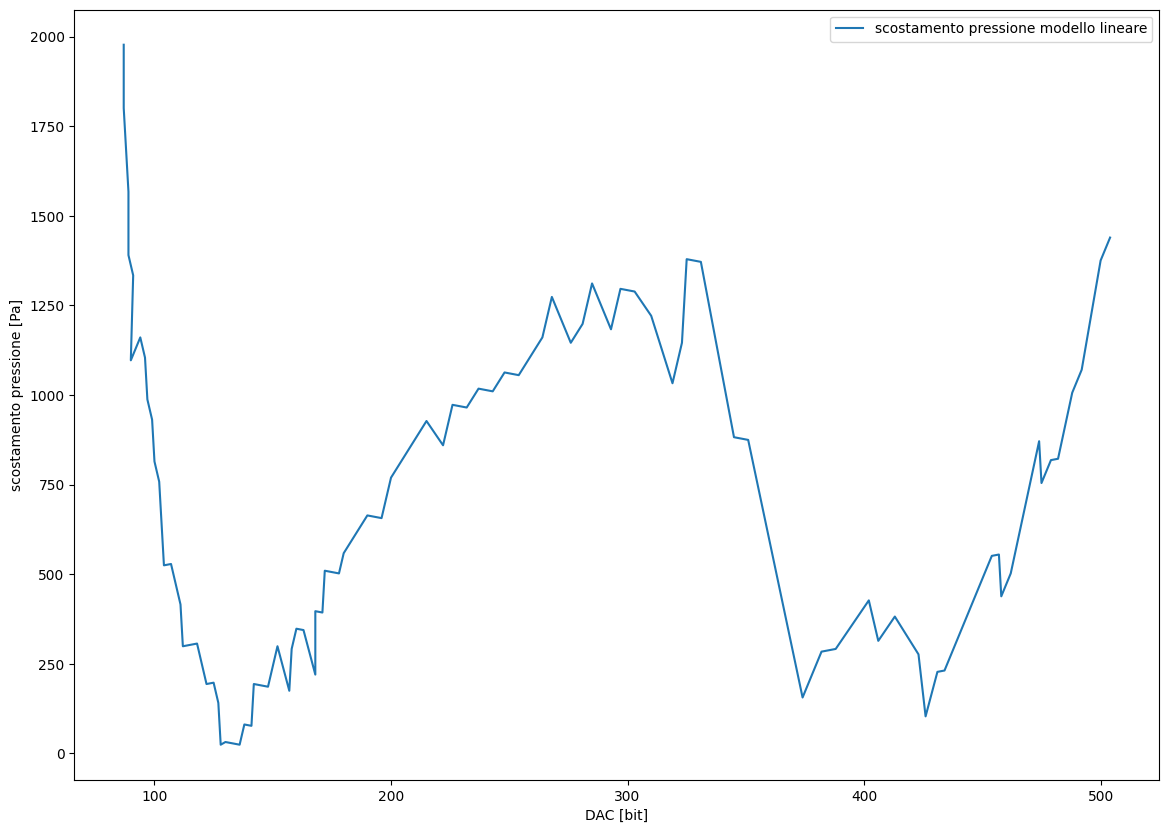

In [20]:
# accuratezza = scostamento max tra valore vero e uscita modello
scostamento1 = abs(ymodello1 - p); 

# errore
scostamento_max = max(scostamento1);

# errore max
errore1 = scostamento_max / max(p) * 100;

# errore percentuale rispetto a valore massim
plt.plot(calib["DAC"], scostamento1)
plt.ylabel('scostamento pressione [Pa]');
plt.xlabel('DAC [bit]')
plt.legend(["scostamento pressione modello lineare"]);
print(f'err = {errore1:#.2f}%')

2. L’errore massimo percentuale con una curva di calibrazione di tipo polinomiale di grado 3

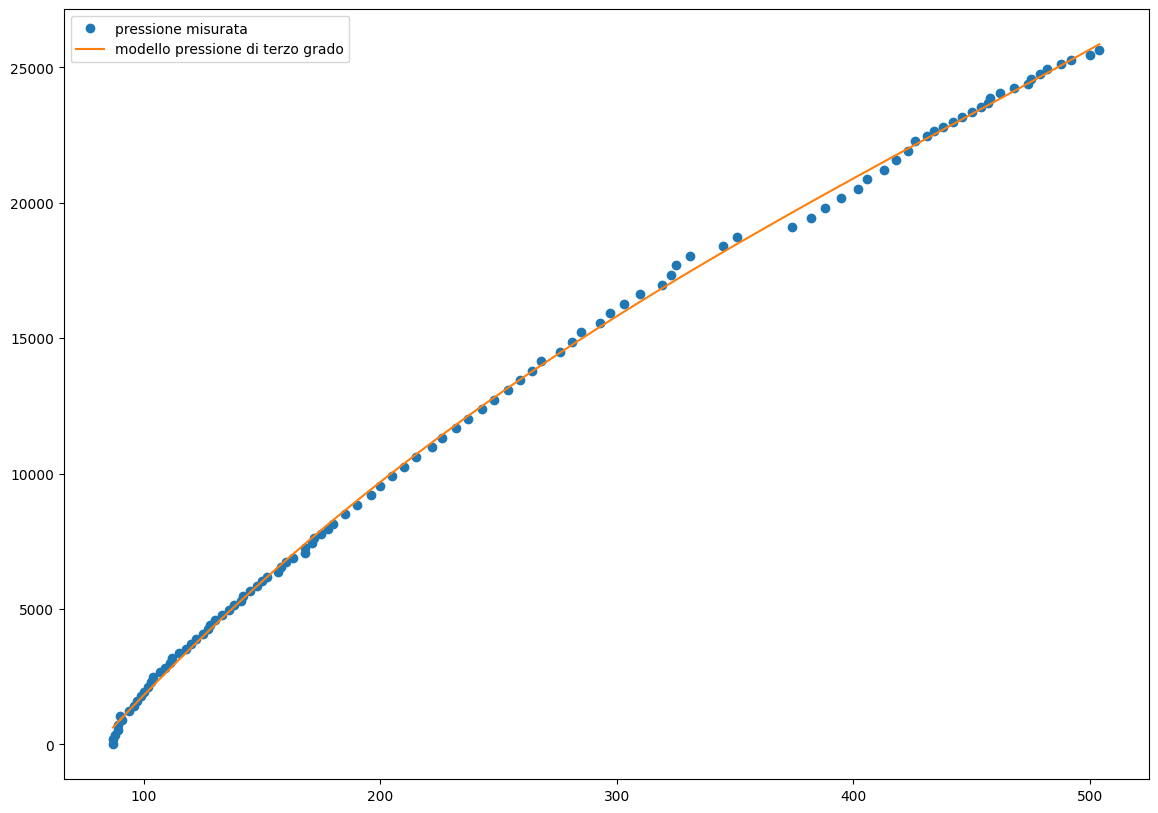

In [21]:
# stima modello di terzo grado (polinomio di terzo grado) con polyfit
modello3 = np.polyfit(calib["DAC"], p, 3);
ymodello3 = np.polyval(modello3, calib["DAC"]);

# confronto con dati
plt.plot(calib["DAC"], p, 'o', calib["DAC"], ymodello3);
plt.legend(["pressione misurata", "modello pressione di terzo grado"]);

err = 2.41%


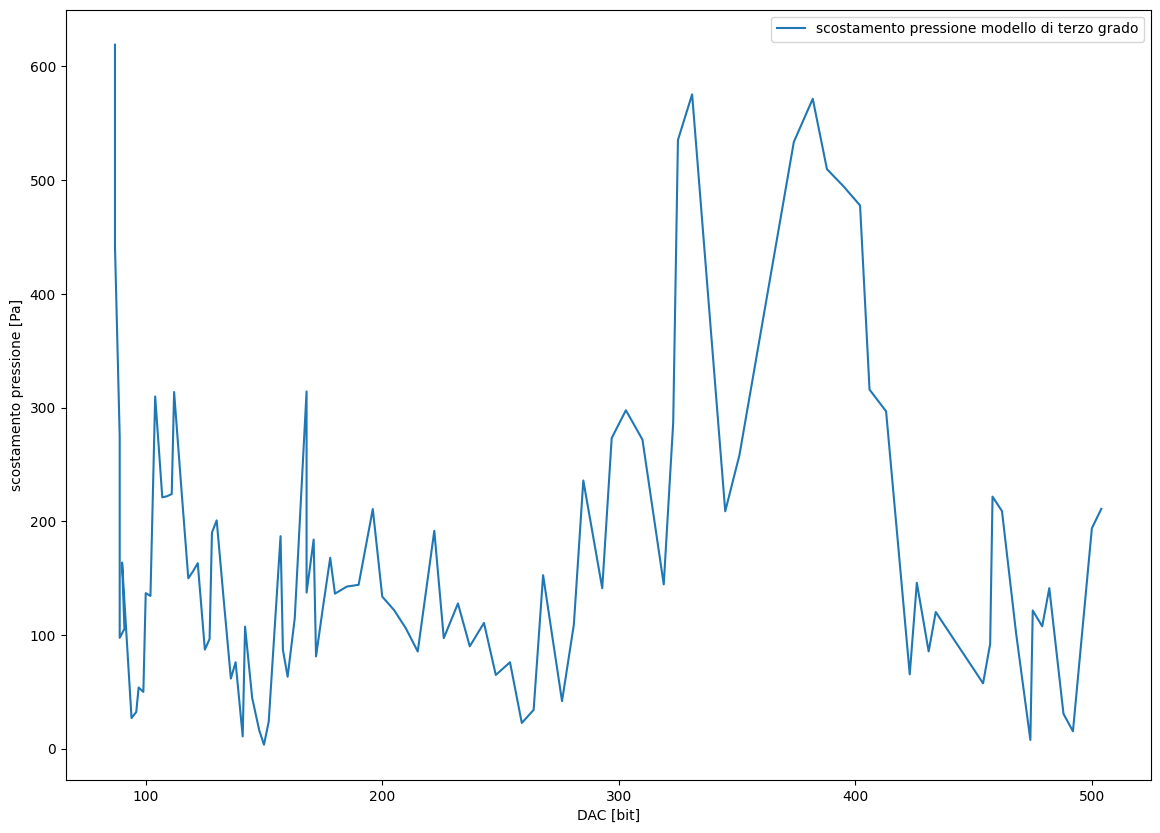

In [22]:
# accuratezza=scostamento max tra valore vero e uscita modello
scostamento3 = abs(ymodello3 - p);

# errore
scostamento_max = max(scostamento3);

# errore max
errore3 = scostamento_max / max(p) * 100;

# errore percentuale rispetto a valore massimo
plt.plot(calib["DAC"], scostamento3);
plt.ylabel('scostamento pressione [Pa]');
plt.xlabel('DAC [bit]');
plt.legend(["scostamento pressione modello di terzo grado"]);
print(f'err = {errore3:#.2f}%');

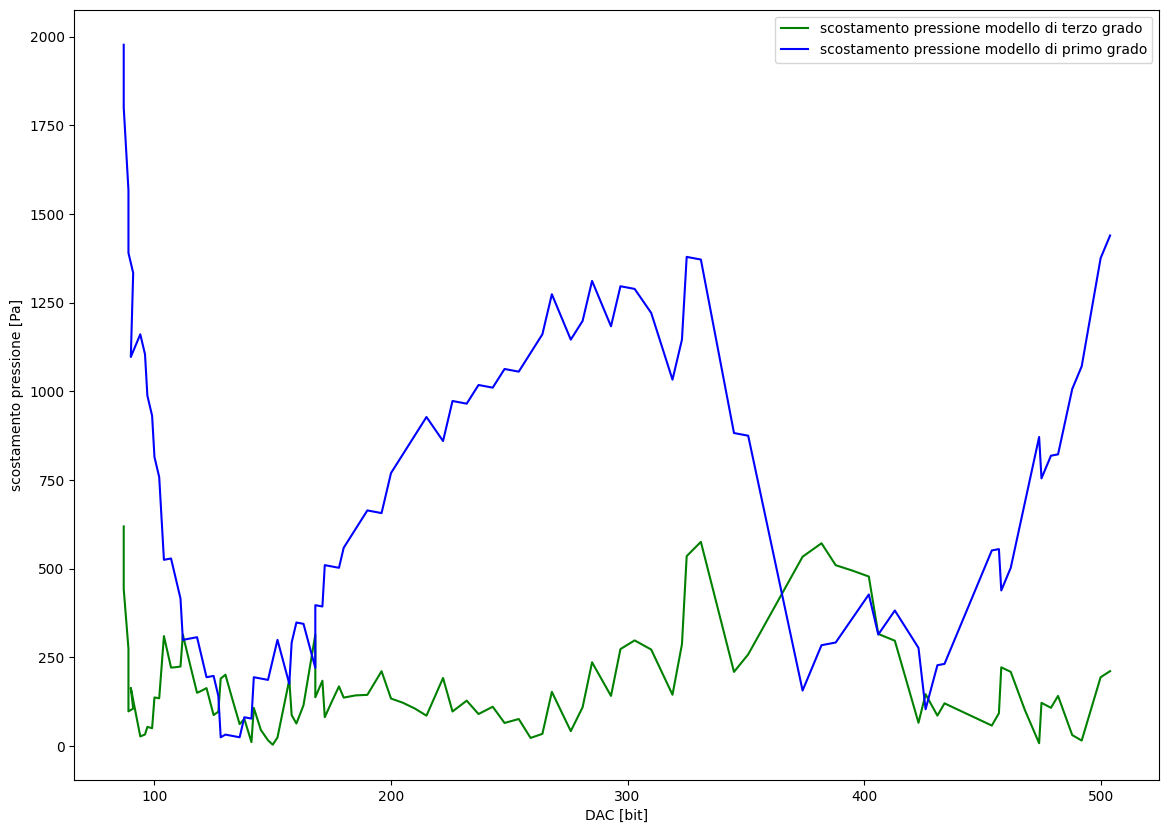

In [23]:
# comparazione errore modello del primo e terzo grado
plt.plot(calib["DAC"], scostamento3, 'g-', calib["DAC"], scostamento1, "b");
plt.ylabel('scostamento pressione [Pa]');
plt.xlabel('DAC [bit]');
plt.legend(["scostamento pressione modello di terzo grado", "scostamento pressione modello di primo grado"])